# Codecademy Project - Twitch Part 2: Visualize Data with Matplotlib

By: Zac Hooper

Because I'm doing this here rather than in the codecademy interface there may be some slight changes. 

I'm going to import some of the libraries that will be required throughout this project. I'm also going to set the csv files to a couple of dataframes that will also be used throughout the project.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

streams = pd.read_csv('Twitch/video_play.csv')
chats = pd.read_csv('Twitch/chat.csv')

## Bar Graph: Featured Games

### 1. Twitch’s home page has a Featured Games section where it lists the “Games people are watching now”.

In the previous part of the project, you used SQL to find the top 10 trending games (on January 1st, 2015) and their number of viewers.

In the next few tasks, you are going to take this data and plot a bar graph using Matplotlib.

Let’s get started!

They provided the top 10 games in the interface. I don't currently have that available and need to obtain it here.

Slight maniuplation of the data to create a dataframe of most popular games

In [5]:
top_games = streams.groupby('game').device_id.count().sort_values(ascending = False).head(10).reset_index().rename(columns={'device_id':'Count'})
print(top_games)

                               game   Count
0                 League of Legends  193524
1                            Dota 2   85603
2  Counter-Strike: Global Offensive   54437
3                              DayZ   37997
4               Heroes of the Storm   35309
5     The Binding of Isaac: Rebirth   29465
6                 Gaming Talk Shows   28115
7                    World of Tanks   15932
8   Hearthstone: Heroes of Warcraft   14399
9                           Agar.io   11478


### 2. The games and viewers are already loaded in the script.py file (they are now lol...):
  - _Now, use the plt.bar() to plot a bar graph using range(len(games)) and viewers as arguments._
  - _Feel free to pick a color, too (using color='____')._
  - _Then, use plt.show() to visualize it._

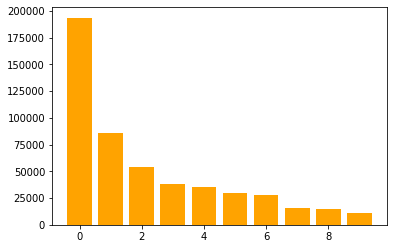

In [6]:
plt.bar(range(len(top_games)), top_games.Count, color='#ffa300')
plt.show()

### 3. Awesome, let’s make the graph more informative by doing the following:
  - _Add a title
  - _Add a legend
  - _Add axis labels
  - _Add ticks
  - _Add tick labels (rotate if necessary)

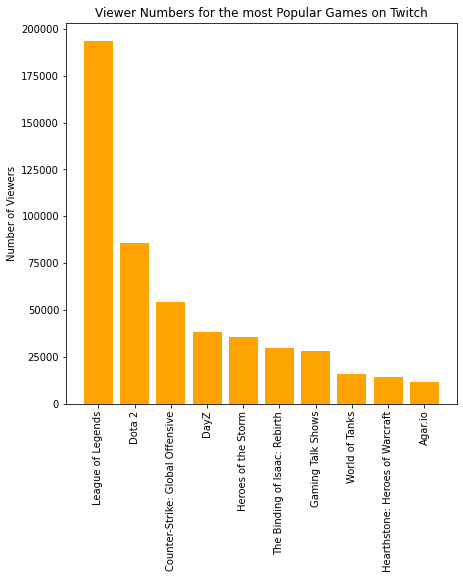

In [7]:
plt.figure(figsize=(7,7))
plt.bar(range(len(top_games)), top_games.Count, color='#ffa300')
plt.xticks(range(len(top_games)), labels=top_games['game'], rotation=90)
plt.ylabel("Number of Viewers")
plt.title('Viewer Numbers for the most Popular Games on Twitch')
plt.show()

## Pie Chart: League of Legends Viewers' Whereabouts

### 5. There are 1070 League of Legends viewers from this dataset. Where are they coming from?

When you performed the SQL query, you got this result:

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/codecademy-content/projects/twitch/countries-sql.png", width=500, height=500)

As well as other countries that accounted for another 279 stream viewers.

In the next few tasks, you are going to take this data and make a pie chart.

Let’s get started!

Again we didn't get this data in this document so we will need to get this data again

In [9]:
top_viewing_countries = streams.groupby('country').device_id.count().sort_values(ascending = False).head(10).reset_index().rename(columns={'device_id':'Count'})
print(top_viewing_countries)

  country   Count
0      US  190364
1      RU   29807
2      TW   29489
3      DE   29262
4      CA   27348
5      GB   22342
6      SE   12648
7      PL   10025
8      TR    9313
9      BR    7637


### 6. The labels and countries are already loaded into script.py:

Let’s add some colors!

Because there are 12 countries (including N/A and Others), let’s create an array called colors and add 12 color codes to it, like so:

In [10]:
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']

Check out the Matplotlib color codes to find your inner Bob Ross.

Then, use plt.pie() to plot a pie chart.

Don’t forget to throw in the countries variable and the colors = colors.

Lastly, use plt.show() to visualize it.

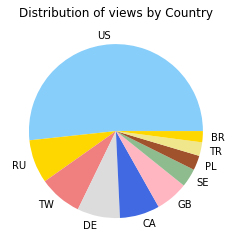

In [11]:
plt.pie(
    x=top_viewing_countries.Count, 
    labels=top_viewing_countries.country,
    colors=colors
)
plt.title('Distribution of views by Country')
plt.show()

### Optional: Let’s make it more visually appealing and more informative.

First, let’s “explode”, or break out, the 1st slice (United States):

In [12]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

Then, inside plt.pie(), we are going to:

- Add the explode
- Add shadows
- Turn the pie 345 degrees
- Add percentages
- Configure the percentages’ placement
So it look something like:

plt.pie(countries, explode=explode, colors=colors, shadow=True, startangle=345, autopct='%1.0f%%', pctdistance=1.15)

Also, we can add a title:

plt.title("League of Legends Viewers' Whereabouts")

And legends:

plt.legend(labels, loc="right")

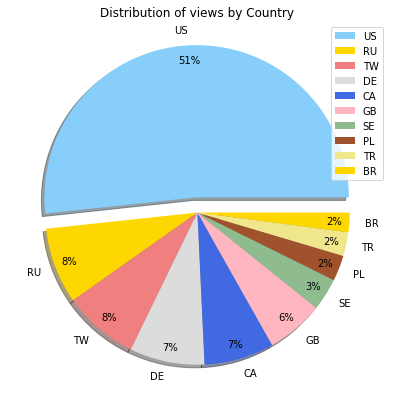

In [13]:
plt.figure(figsize=(7,7))
plt.pie(
    x=top_viewing_countries.Count, 
    labels=top_viewing_countries.country,
    colors=colors, 
    explode=explode,
    shadow=True,
    autopct='%1d%%',
    pctdistance = .9
)
plt.title('Distribution of views by Country')
plt.legend()
plt.show()

## Line Graph: Time Series Analysis

### 9. We were able to find the number of US viewers at different hours of the day on January 1st, 2015:

In [15]:
Image(url= "https://s3.amazonaws.com/codecademy-content/projects/twitch/time.png", width=350, height=350)

Let’s make this into a line graph

### 10. The hour and viewers_hour area already loaded into script.py:
Use plt.plot() to plot a line graph.

Don’t forget to throw in hour and viewers_hour.

Then, add the title, the axis labels, legend, and ticks.

Lastly, use plt.show() to visualize.

Again we don't have this data loaded here and need to obtain it ourselves.

As the time is a string and not a datetime we get the position of the hour and return it as a int variable 

In [52]:
hourify = lambda x : int(x[11:13])
streams['hour'] = streams.time.apply(hourify)
print(streams.hour.head(10))

0    18
1    23
2     4
3    11
4    11
5    23
6    21
7    19
8    13
9    22
Name: hour, dtype: int64


Now in order to match their graph we need to groupby the hour column and filter to only contain users from the US

In [71]:
us_viewers_each_hour = streams[streams.country == 'US'].groupby('hour').device_id.count().reset_index().rename(columns={'device_id':'viewers'})

print(us_viewers_each_hour)

    hour  viewers
0      0     7025
1      1     4693
2      2     5959
3      3     4236
4      4     3567
5      5     1597
6      6      236
7      7      338
8      8      934
9      9     1214
10    10     1940
11    11     7349
12    12    11766
13    13     9740
14    14     7519
15    15     9065
16    16    10133
17    17    11929
18    18    12215
19    19    15203
20    20    19655
21    21    18423
22    22    13983
23    23    11645


Finally continue with the question to plot the data on a line graph

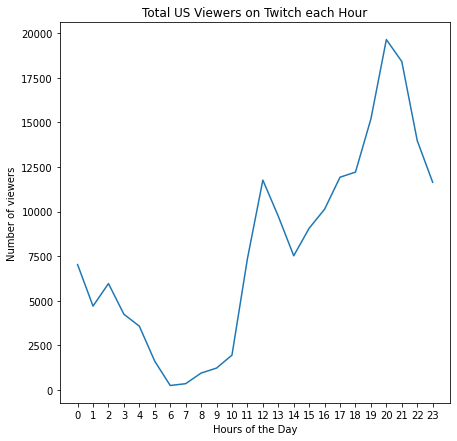

In [78]:
x = range(len(us_viewers_each_hour.hour))
y1 = us_viewers_each_hour.viewers

f = plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
ax.plot(x, y1)
ax.set_xticks(x)
ax.set_xlabel('Hours of the Day')
ax.set_ylabel('Number of viewers')
ax.set_title('Total US Viewers on Twitch each Hour')

plt.show()

### 11. There is some uncertainty in these numbers because some people leave their browsers open. Let’s account for a 15% error in the viewers_hour data.
  - _First, create a list containing the upper bound of the viewers_hour and call it y_upper._
  - _Then, create a list containing the lower bound of the viewers_hour and call it y_lower._
  - _Lastly, use plt.fill_between() to shade the error, with an alpha of 0.2._

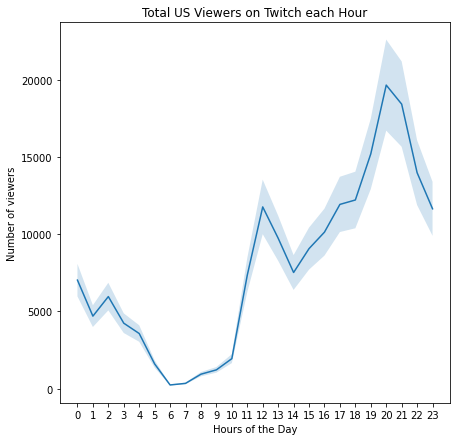

In [84]:
#Set Upper / lower bound lists
upper_bound_viewers = us_viewers_each_hour.viewers * 1.15
lower_bound_viewers = us_viewers_each_hour.viewers * 0.85

f2 = plt.figure(figsize=(7,7))
ax2 = plt.subplot(1,1,1)
ax2.plot(x, y1)
ax2.fill_between(x, upper_bound_viewers, lower_bound_viewers, alpha=0.2)
ax2.set_xticks(x)
ax2.set_xlabel('Hours of the Day')
ax2.set_ylabel('Number of viewers')
ax2.set_title('Total US Viewers on Twitch each Hour')

plt.show()
